# Team Members
*   Χρήστος Πετρόπουλος 1115202100156
*   Μαρίνα Παπαδημητρίου 1115202100136

# Google mount, libraries installation's and used imports

In [20]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [21]:
!pip install matlib
!pip install pandas
!pip install wordcloud


In [22]:
import matlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os
import folium
import nltk

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data import from our drive



In [23]:
# Load the listings file into a DataFrame

listings_april_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/april/listings.csv', dtype={'price': str, 'weekly_price': str})
listings_febrouary_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/febrouary/listings.csv', dtype={'price': str, 'weekly_price': str})
listings_march_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/march/listings.csv', dtype={'price': str, 'weekly_price': str})

listings_june_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/june/listings.csv', dtype={'price': str, 'weekly_price': str})
listings_march_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/march/listings.csv', dtype={'price': str, 'weekly_price': str})
listings_september_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/september/listings.csv', dtype={'price': str, 'weekly_price': str})

<ipython-input-23-995af2b9c9c7>:3: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_april_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/april/listings.csv', dtype={'price': str, 'weekly_price': str})
<ipython-input-23-995af2b9c9c7>:4: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_febrouary_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/febrouary/listings.csv', dtype={'price': str, 'weekly_price': str})
<ipython-input-23-995af2b9c9c7>:5: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_march_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/march/listings.csv', dtype={'price': str, 'weekly_price': str})


#Data manipulation
<p>Here we run the following blocks in the order written, in order to remove NaN, empty, and extreme values (using IQR method, and decrease our data by approximately 30%). Also, we remove $ from the price columns, in order to not be a string anymore. We added a month column to our train files for future questions. Moreover, we removed the empty columns from 2023, that we were asked to save, because they would be useless. Lastly, we kept the neighbourhood_cleansed column for future questions about 2023.</p>


In [24]:
# Define the list of columns to keep
# We kept some extra collumns such as the neighbourhood_cleansed for future questions

columns_to_keep_2019 = [
    'id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review',
    'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price',
    'availability_365', 'minimum_nights','month','host_total_listings_count','host_id'
]

# There are no 'zipcode', 'transit', 'city', 'cancellation_policy', 'bed_type' collumns in 2023 listings file, so we dont look for them + 'bathrooms' is empty so it's useless
columns_to_keep_2023 = [
    'id', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review',
    'description',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price',
    'availability_365', 'minimum_nights','month','host_total_listings_count','host_id'
]

# Add a new column named 'month' to indicate the month of each row
listings_april_2019['month'] = 'April'
listings_febrouary_2019['month'] = 'February'
listings_march_2019['month'] = 'March'

# Merge the dataframes to identify the corresponding month
listings_df_2019_0 = pd.concat([listings_april_2019, listings_febrouary_2019, listings_march_2019], ignore_index=True)

# Add a new column named 'month' to indicate the month of each row
listings_june_2023['month'] = 'June'
listings_march_2023['month'] = 'March'
listings_september_2023['month'] = 'September'

# Merge the dataframes to identify the corresponding month
listings_df_2023_0 = pd.concat([listings_june_2023, listings_march_2023, listings_september_2023], ignore_index=True)

# Keep only the specified columns in the DataFrame
listings_df_2019 = listings_df_2019_0.loc[:, columns_to_keep_2019 ]
listings_df_2023 = listings_df_2023_0.loc[:, columns_to_keep_2023]

# Will be usefull for later queries
listings_april_2019 = listings_april_2019.loc[:,columns_to_keep_2019 ]
listings_febrouary_2019 = listings_febrouary_2019.loc[:,columns_to_keep_2019 ]
listings_march_2019 = listings_march_2019.loc[:,columns_to_keep_2019 ]

listings_june_2023 = listings_june_2023.loc[:,columns_to_keep_2023]
listings_march_2023 = listings_march_2023.loc[:,columns_to_keep_2023]
listings_september_2023 = listings_september_2023.loc[:,columns_to_keep_2023]

In [25]:
# Functions uses for the initialization of the train files

# Function to replace NaN values with '-' for text columns and with the column's mean for numerical columns
def replace_nan(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Replace NaN values with '-'
            df[column] = df[column].fillna('-')
        else:
            # Replace NaN values with the mean of the column
            df[column] = df[column].fillna(df[column].mean())
    return df

def remove_dollar_sign(df, column):
    # Remove '$' sign from the price column
    df[column] = df[column].replace(r'\$', '', regex=True)

    # Convert the column to numeric type
    df[column] = pd.to_numeric(df[column], errors='coerce')

    return df


# Function to remove rows with extreme values using the IQR method
def remove_extreme_values_iqr(df, columns):
    # Copy the original DataFrame to avoid modifying it directly
    filtered_df = df.copy()

    # Iterate over specified columns
    for column in columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define lower and upper bounds for extreme values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows with values outside the range [lower_bound, upper_bound]
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

    return filtered_df

# Define the columns to check for extreme values using the IQR method
columns_to_check_iqr_2019 = ['bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'latitude', 'longitude',
                        'price', 'availability_365', 'minimum_nights','bathrooms']
columns_to_check_iqr_2023 = ['bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'latitude', 'longitude',
                        'price', 'availability_365', 'minimum_nights']

# Define the columns with '$' symbol to be processed
columns_with_dollar_sign = ['price']

# Apply operations to listings_df_2019
for column in columns_with_dollar_sign:
    listings_df_2019_cleaned = remove_dollar_sign(listings_df_2019, column)
listings_df_2019_cleaned = replace_nan(listings_df_2019_cleaned)
listings_df_2019_cleaned = remove_extreme_values_iqr(listings_df_2019_cleaned, columns_to_check_iqr_2019)


# Apply operations to listings_df_2023
for column in columns_with_dollar_sign:
    listings_df_2023_cleaned = remove_dollar_sign(listings_df_2023, column)
listings_df_2023_cleaned = replace_nan(listings_df_2023_cleaned)
listings_df_2023_cleaned = remove_extreme_values_iqr(listings_df_2023_cleaned, columns_to_check_iqr_2023)

# Useful for other questions
for column in columns_with_dollar_sign:
  listings_april_2019 =  remove_dollar_sign(listings_april_2019, column)
  listings_febrouary_2019 =  remove_dollar_sign(listings_febrouary_2019, column)
  listings_march_2019 =  remove_dollar_sign(listings_march_2019, column)
  listings_june_2023 =  remove_dollar_sign(listings_june_2023, column)
  listings_march_2023 =  remove_dollar_sign(listings_march_2023, column)
  listings_september_2023 =  remove_dollar_sign(listings_september_2023, column)

# Print the size of the DataFrames before and after filtering
print("Size of the DataFrame before filtering for 2019:", listings_df_2019.shape)
print("Size of the DataFrame after filtering for 2019:", listings_df_2019_cleaned.shape)
print("Size of the DataFrame before filtering for 2023:", listings_df_2023.shape)
print("Size of the DataFrame after filtering for 2023:", listings_df_2023_cleaned.shape)

Size of the DataFrame before filtering for 2019: (28122, 34)
Size of the DataFrame after filtering for 2019: (15774, 34)
Size of the DataFrame before filtering for 2023: (36682, 28)
Size of the DataFrame after filtering for 2023: (22880, 28)


In [26]:
# Rename listing_df_cleaned to train_2019
train_2019 = listings_df_2019_cleaned.copy()

# Save train_2019 to CSV
train_2019.to_csv('/content/gdrive/MyDrive/tede-project1/train_2019.csv', index=False)

# Rename listing_df_cleaned to train_2023
train_2023 = listings_df_2023_cleaned.copy()

# Save train_2023 to CSV
train_2023.to_csv('/content/gdrive/MyDrive/tede-project1/train_2023.csv', index=False)




# 1.1


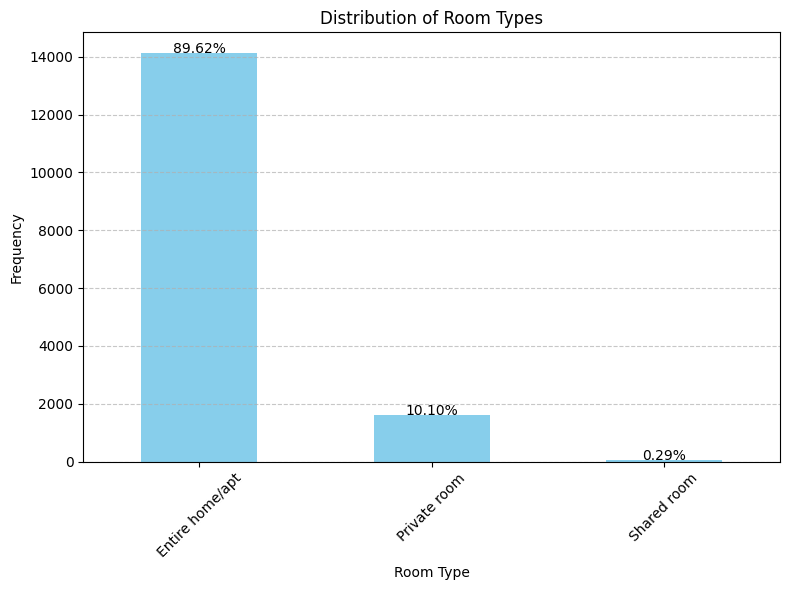

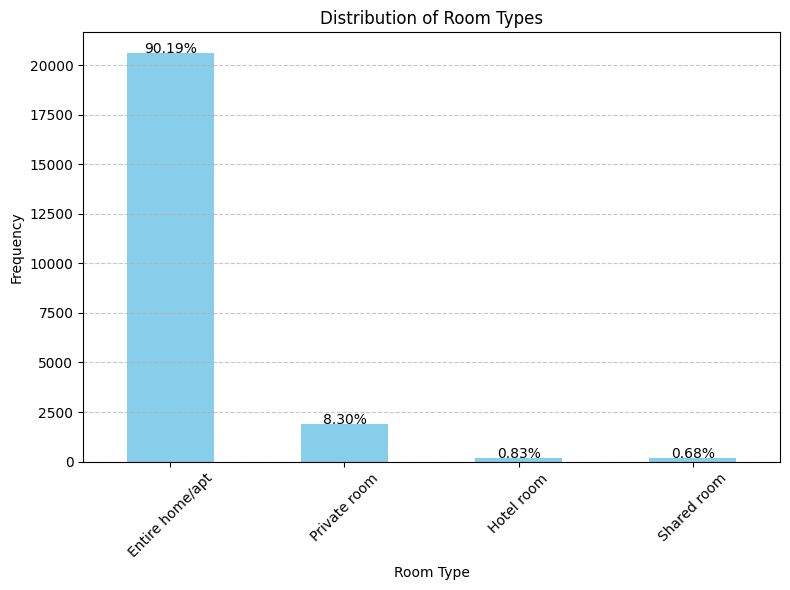

In [27]:
# 1.1

def plot_room_type_distribution(df):
    # Find the frequency of each room type
    room_type_counts = df['room_type'].value_counts()

    # Calculate percentages
    total_listings = len(df)
    room_type_percentages = (room_type_counts / total_listings) * 100

    # Plot the distribution using Matplotlib
    plt.figure(figsize=(8, 6))
    room_type_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Annotate the bar plot with percentages
    for i, count in enumerate(room_type_counts):
        plt.text(i, count + 0.5, f'{room_type_percentages.iloc[i]:.2f}%', ha='center')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage example:
plot_room_type_distribution(train_2019)
plot_room_type_distribution(train_2023)


#1.2
We decided to get the average value, because we didnt keep any date collumn from our starting data, when we made the train files.

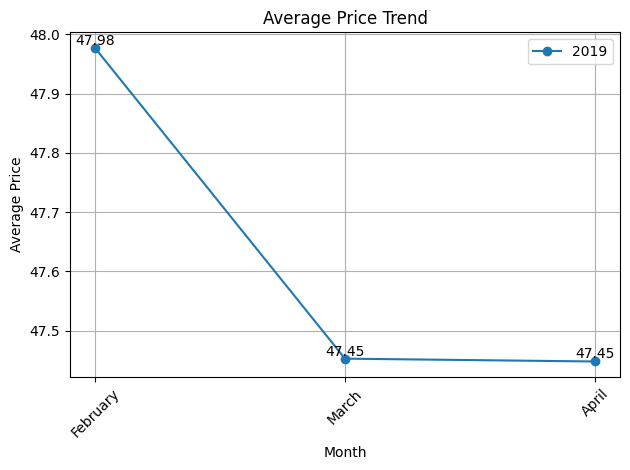

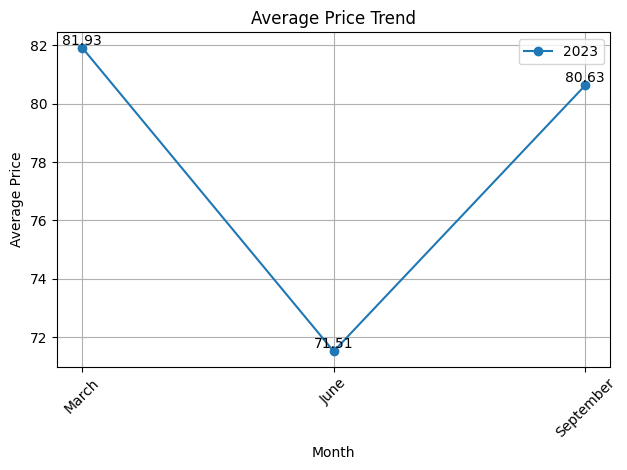

In [28]:
#1.2

def plot_average_price_trend(months, dataframe, label):
    # Group the DataFrame by the 'month' column and calculate the average price for each month
    monthly_avg_price = dataframe.groupby('month')['price'].mean()

    # Plot the average price trend
    plt.plot(months, monthly_avg_price, marker='o', linestyle='-', label=label)

    # Annotate each point with its average price value
    for month, price in zip(months, monthly_avg_price):
        plt.text(month, price, f'{price:.2f}', ha='center', va='bottom')

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title('Average Price Trend')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping of labels
    plt.legend()  # Show legend for the line
    plt.show()

# Define months for 2019 and 2023
months_2019 = ['February', 'March', 'April']
months_2023 = ['March', 'June', 'September']

# Plot average price trend for 2019
plot_average_price_trend(months_2019, train_2019, '2019')

# Plot average price trend for 2023
plot_average_price_trend(months_2023, train_2023, '2023')



# 1.3

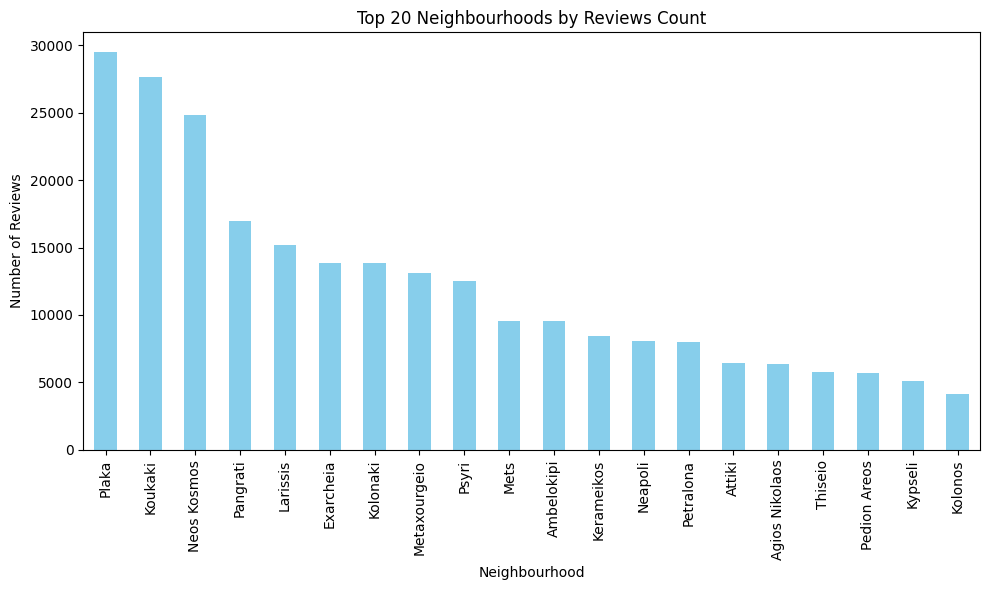

Top 5 Neighbourhoods with the Most Reviews:
neighbourhood
Plaka          29468
Koukaki        27661
Neos Kosmos    24808
Pangrati       16954
Larissis       15170
Name: number_of_reviews, dtype: int64


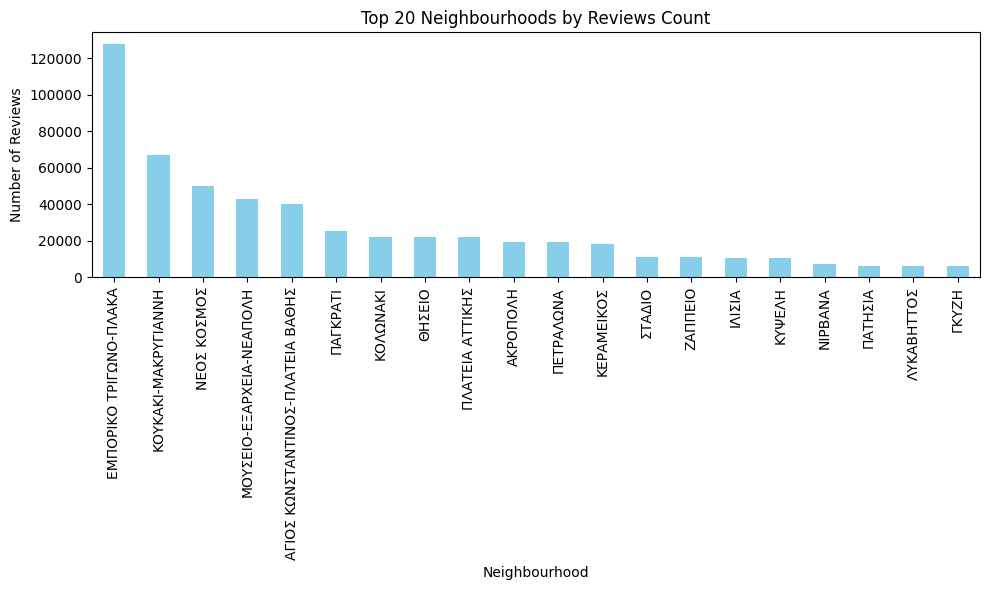

Top 5 Neighbourhoods with the Most Reviews:
neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              127808
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  67268
ΝΕΟΣ ΚΟΣΜΟΣ                          49999
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             42977
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     40421
Name: number_of_reviews, dtype: int64


In [29]:
#1.3

def plot_top_neighbourhoods_by_reviews(df, neighbourhood_column):
    # Group the data by neighbourhood and sum the number of reviews for each neighbourhood
    neighbourhood_reviews = df.groupby(neighbourhood_column)['number_of_reviews'].sum()

    # Sort the result in descending order
    neighbourhood_reviews_sorted = neighbourhood_reviews.sort_values(ascending=False)

    # Get the top 20 neighbourhoods by reviews count
    top_20_neighbourhoods = neighbourhood_reviews_sorted.head(20)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    top_20_neighbourhoods.plot(kind='bar', color='skyblue')
    plt.title('Top 20 Neighbourhoods by Reviews Count')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Print the top 5 neighbourhoods
    top_5_neighbourhoods = neighbourhood_reviews_sorted.head(5)
    print("Top 5 Neighbourhoods with the Most Reviews:")
    print(top_5_neighbourhoods)

# Usage example for 2019 data
plot_top_neighbourhoods_by_reviews(train_2019, 'neighbourhood')

# Usage example for 2023 data
# Some diagram misfunction on the x axis (names appear a bit off)
plot_top_neighbourhoods_by_reviews(train_2023, 'neighbourhood_cleansed')



# 1.4

Neighbourhood with the Most Property Listings (2019): Plaka


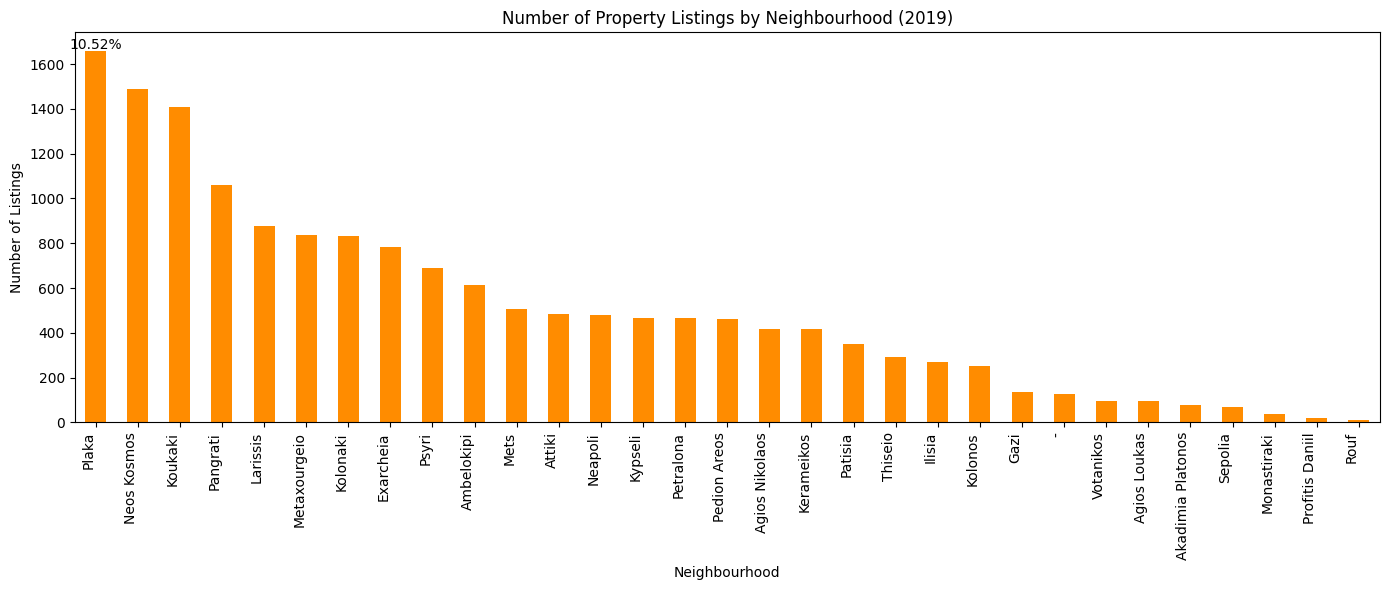

Neighbourhood with the Most Property Listings (2023): ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


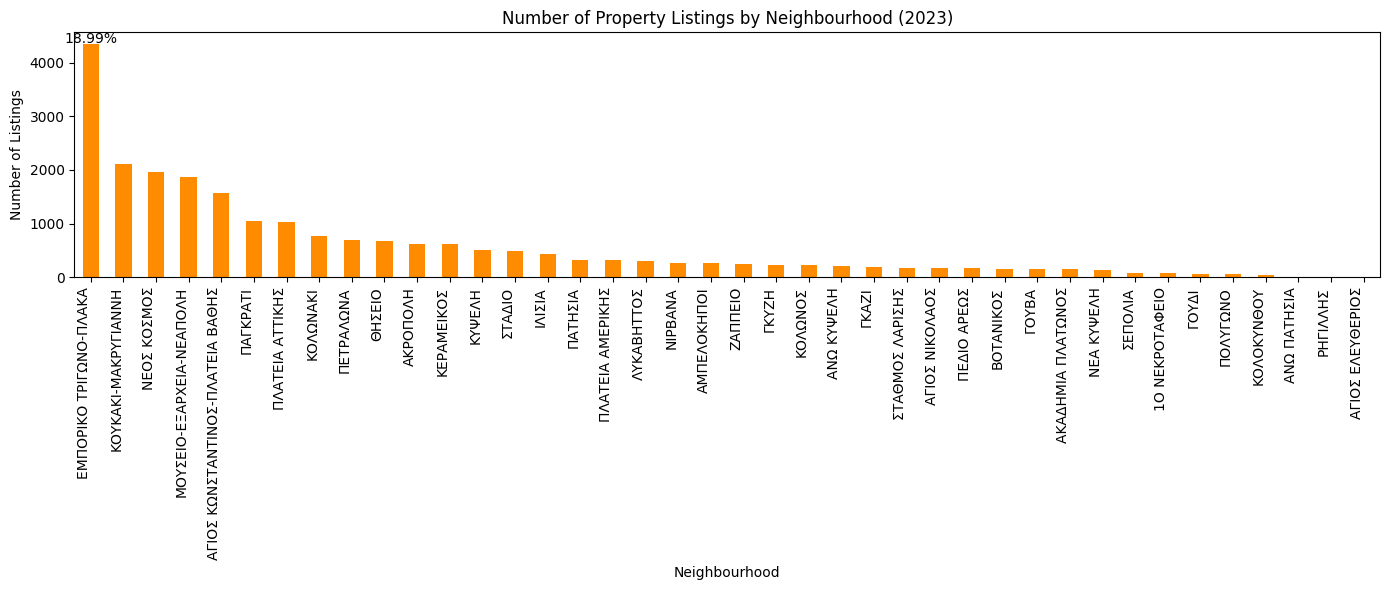

In [30]:
#1.4

def plot_neighbourhood_listings_count(listings_df, year):
    if year == 2019:
        # Group the data by neighbourhood and count the number of listings in each neighbourhood
        neighbourhood_listings_count = listings_df.groupby('neighbourhood')['id'].count()
        # Find the neighbourhood with the most property listings
        most_listings_neighbourhood = neighbourhood_listings_count.idxmax()
        print("Neighbourhood with the Most Property Listings (2019):", most_listings_neighbourhood)
    elif year == 2023:
        # Group the data by neighbourhood cleansed and count the number of listings in each neighbourhood
        neighbourhood_listings_count = listings_df.groupby('neighbourhood_cleansed')['id'].count()
        # Find the neighbourhood with the most property listings
        most_listings_neighbourhood = neighbourhood_listings_count.idxmax()
        print("Neighbourhood with the Most Property Listings (2023):", most_listings_neighbourhood)

    # Sort the neighbourhood listings count in descending order
    neighbourhood_listings_count_sorted = neighbourhood_listings_count.sort_values(ascending=False)

    # Calculate the percentage of properties from the most listings neighbourhood relative to all properties
    max_listings_count = neighbourhood_listings_count_sorted.iloc[0]
    total_listings = neighbourhood_listings_count_sorted.sum()
    max_neighbourhood_percentage = (max_listings_count / total_listings) * 100

    # Plot the number of property listings in each neighbourhood
    plt.figure(figsize=(14, 6))
    neighbourhood_listings_count_sorted.plot(kind='bar', color='darkorange')
    plt.title(f'Number of Property Listings by Neighbourhood ({year})')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

    # Annotate the bar plot with the percentage of properties from the most listings neighbourhood relative to all properties
    plt.text(0, max_listings_count + 10, f'{max_neighbourhood_percentage:.2f}%', ha='center')

    plt.show()

# Call the function for 2019
plot_neighbourhood_listings_count(train_2019, 2019)

# Call the function for 2023
plot_neighbourhood_listings_count(train_2023, 2023)


# 1.5/1.6
1.5 and 1.6 are the same, the first has the plot(bar diagram that we were asked to make), the second is just a print of the plot's data

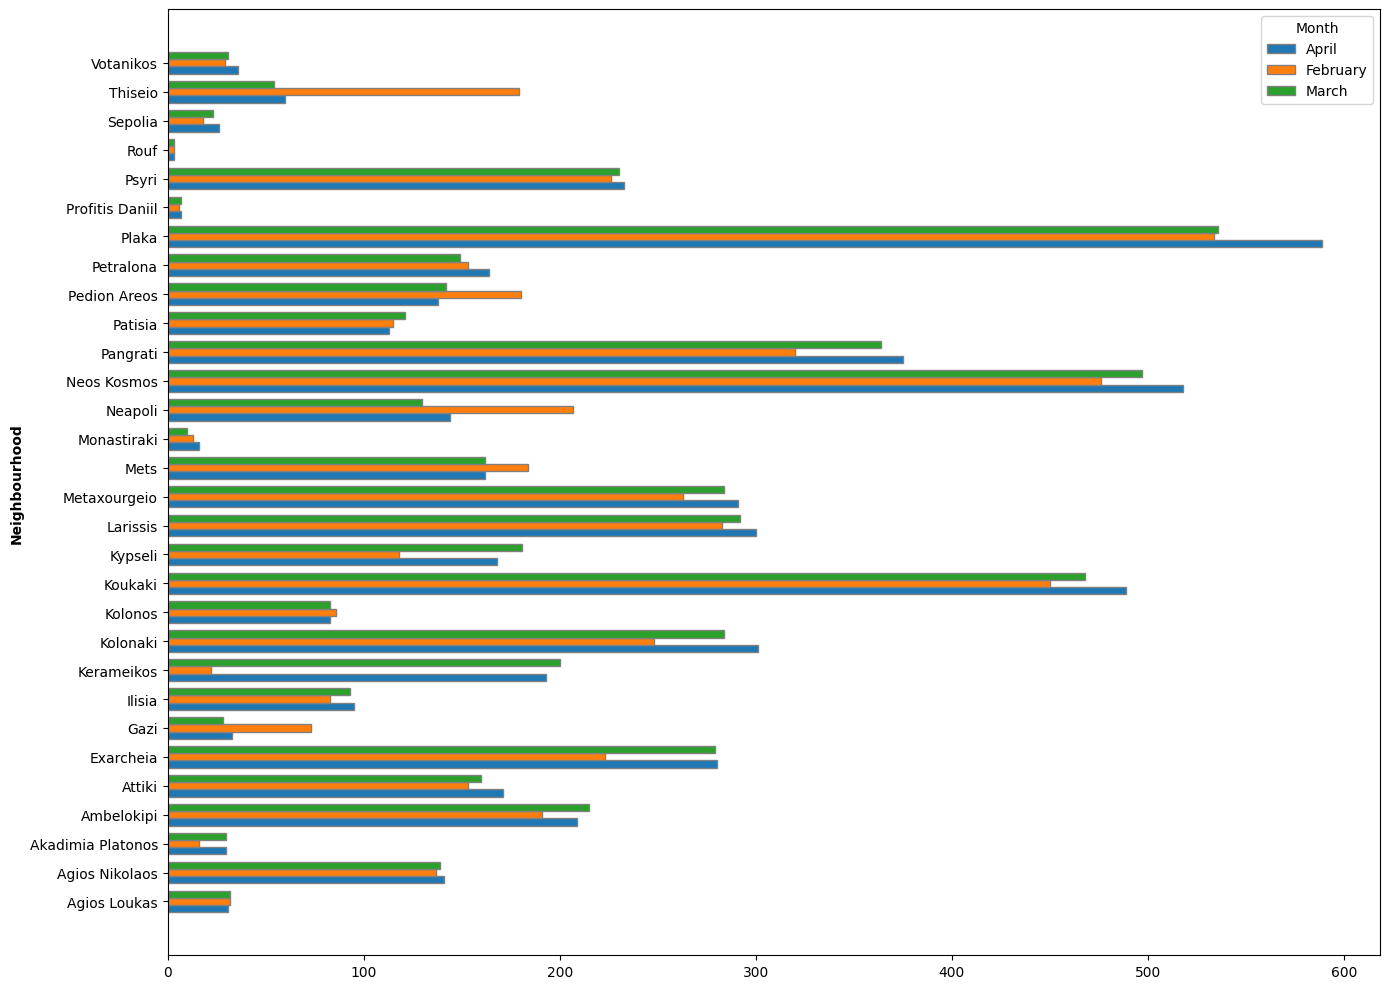

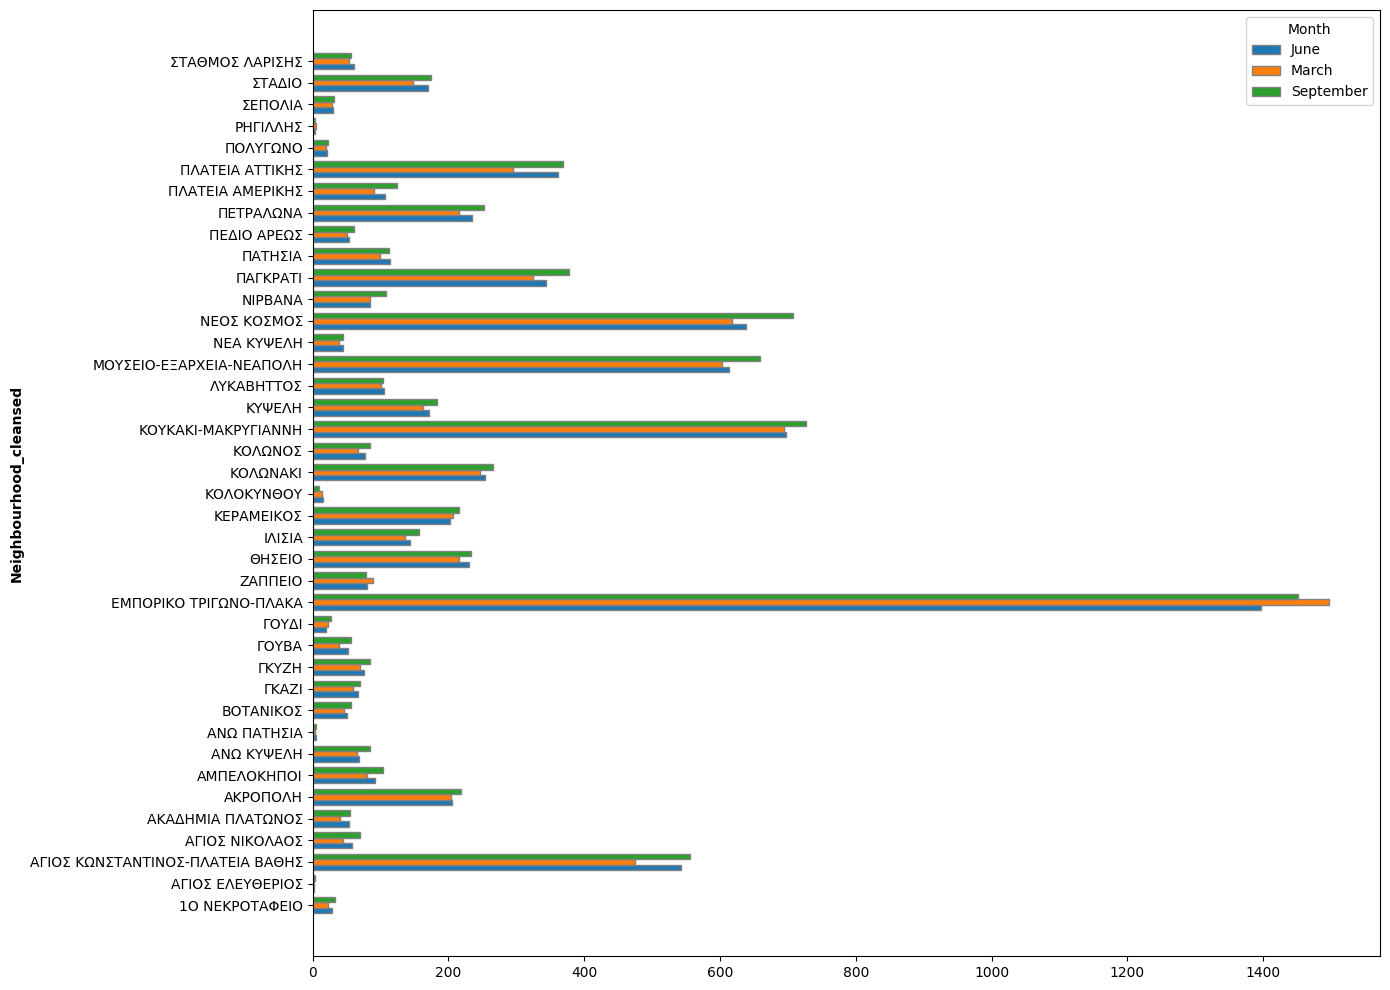

In [31]:
#1.5 (1.5 and 1.6 are the same, the first has the plot, the second is just a print of the plot's data)

def plot_listings_per_neighbourhood(dataframe, neighbourhood_column):
    # Filter out rows with neighbourhood name "-"
    dataframe_filtered = dataframe[dataframe[neighbourhood_column] != '-']

    # Group the data by 'month' and the specified neighbourhood column, and count the occurrences
    listings_count = dataframe_filtered.groupby([neighbourhood_column, 'month']).size().unstack(fill_value=0)

    # Get the list of unique months
    months = dataframe_filtered['month'].unique()

    # Set the width of the bars
    bar_width = 0.25

    # Set the position of the bars on the y-axis
    r = np.arange(len(listings_count.index))

    # Create the plot
    plt.figure(figsize=(14, 10))
    for i, month in enumerate(months):
        plt.barh(r + i * bar_width, listings_count[month], height=bar_width, edgecolor='grey', label=month)

    # Add yticks on the middle of the group bars
    plt.ylabel(neighbourhood_column.capitalize(), fontweight='bold')
    plt.yticks(r + bar_width * (len(months) - 1) / 2, listings_count.index)

    # Create legend & Show graphic
    plt.legend(title='Month', loc='upper right')
    plt.tight_layout()
    plt.show()

# Example usage for 2019 with 'neighbourhood' column
plot_listings_per_neighbourhood(train_2019, 'neighbourhood')

# Example usage for 2023 with 'neighbourhood_cleansed' column
plot_listings_per_neighbourhood(train_2023, 'neighbourhood_cleansed')





In [32]:
#1.6
def print_listings_per_neighbourhood(dataframe, neighbourhood_column):
    # Filter out rows with neighbourhood name "-"
    dataframe_filtered = dataframe[dataframe[neighbourhood_column] != '-']

    # Group the data by 'month' and the specified neighbourhood column, and count the occurrences
    listings_count = dataframe_filtered.groupby([neighbourhood_column, 'month']).size().unstack(fill_value=0)

    # Get the list of unique months
    months = dataframe_filtered['month'].unique()

    # Print the listings count for each neighbourhood and month
    for index, row in listings_count.iterrows():
        print(f"Neighbourhood: {index}")
        for month in months:
            print(f"\tMonth: {month}, Listings: {row[month]}")

# Example usage for 2019 with 'neighbourhood' column
print("Listings per Neighbourhood for 2019:")
print_listings_per_neighbourhood(train_2019, 'neighbourhood')

# Example usage for 2023 with 'neighbourhood_cleansed' column
print("\nListings per Neighbourhood for 2023:")
print_listings_per_neighbourhood(train_2023, 'neighbourhood_cleansed')


Listings per Neighbourhood for 2019:
Neighbourhood: Agios Loukas
	Month: April, Listings: 31
	Month: February, Listings: 32
	Month: March, Listings: 32
Neighbourhood: Agios Nikolaos
	Month: April, Listings: 141
	Month: February, Listings: 137
	Month: March, Listings: 139
Neighbourhood: Akadimia Platonos
	Month: April, Listings: 30
	Month: February, Listings: 16
	Month: March, Listings: 30
Neighbourhood: Ambelokipi
	Month: April, Listings: 209
	Month: February, Listings: 191
	Month: March, Listings: 215
Neighbourhood: Attiki
	Month: April, Listings: 171
	Month: February, Listings: 153
	Month: March, Listings: 160
Neighbourhood: Exarcheia
	Month: April, Listings: 280
	Month: February, Listings: 223
	Month: March, Listings: 279
Neighbourhood: Gazi
	Month: April, Listings: 33
	Month: February, Listings: 73
	Month: March, Listings: 28
Neighbourhood: Ilisia
	Month: April, Listings: 95
	Month: February, Listings: 83
	Month: March, Listings: 93
Neighbourhood: Kerameikos
	Month: April, Listings

#1.7
We have the answser as a table and as a diagram

Most Common Room Types in Each Neighborhood for 2019:
+-------------------+-------------------------+---------+
| Neighborhood      | Most Common Room Type   |   Count |
+===================+=========================+=========+
| Agios Loukas      | Entire home/apt         |      80 |
+-------------------+-------------------------+---------+
| Agios Nikolaos    | Entire home/apt         |     363 |
+-------------------+-------------------------+---------+
| Akadimia Platonos | Entire home/apt         |      60 |
+-------------------+-------------------------+---------+
| Ambelokipi        | Entire home/apt         |     579 |
+-------------------+-------------------------+---------+
| Attiki            | Entire home/apt         |     439 |
+-------------------+-------------------------+---------+
| Exarcheia         | Entire home/apt         |     692 |
+-------------------+-------------------------+---------+
| Gazi              | Entire home/apt         |     107 |
+-----------------

<Figure size 3000x1500 with 0 Axes>

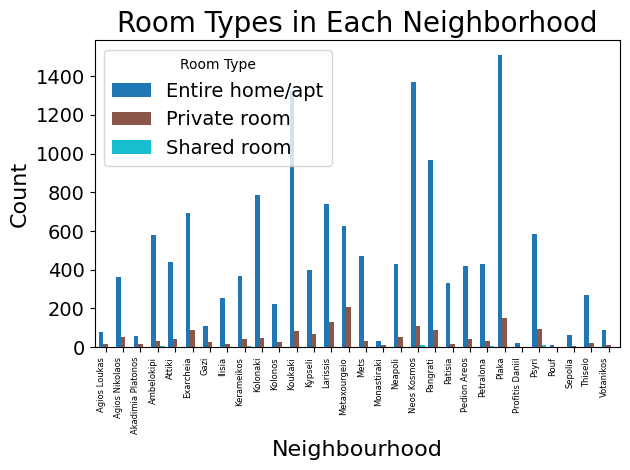

<Figure size 3000x1500 with 0 Axes>

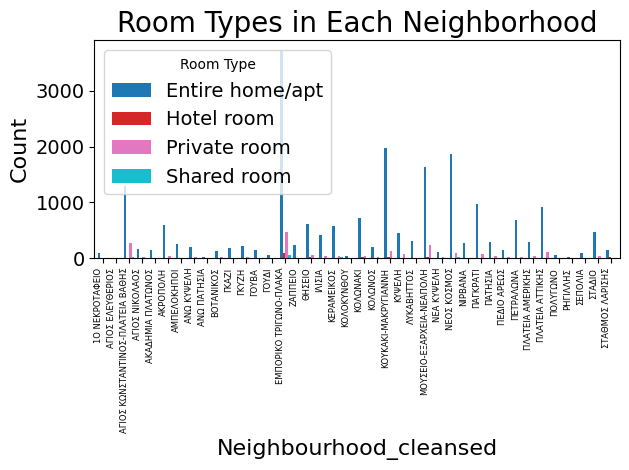

In [33]:
#1.7
def find_most_common_roomtype_per_neighborhood(dataframe, neighbourhood_column):
    # Group the data by both neighborhood and room type, and count the occurrences of each combination
    neighborhood_roomtype_counts = dataframe.groupby([neighbourhood_column, 'room_type']).size()

    # Reset the index to make it easier to work with the grouped data
    neighborhood_roomtype_counts = neighborhood_roomtype_counts.reset_index(name='count')

    # Find the most common room type (room_type) in each neighborhood
    most_common_roomtype_per_neighborhood = neighborhood_roomtype_counts.groupby(neighbourhood_column).apply(lambda x: x.loc[x['count'].idxmax()])

    return most_common_roomtype_per_neighborhood[['room_type', 'count']]

def plot_room_types_per_neighborhood(dataframe, neighbourhood_column):
    # Group the data by both neighborhood and room type, and count the occurrences of each combination
    neighborhood_roomtype_counts = dataframe.groupby([neighbourhood_column, 'room_type']).size().reset_index(name='count')

    # Pivot the table to have room types as columns
    pivot_df = neighborhood_roomtype_counts.pivot(index=neighbourhood_column, columns='room_type', values='count').fillna(0)

    # Plot the clustered bar chart
    plt.figure(figsize=(30, 15))
    pivot_df.plot(kind='bar', stacked=False, cmap='tab10', width=0.8)

    # Set labels and title
    plt.xlabel(neighbourhood_column.capitalize(), fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title('Room Types in Each Neighborhood', fontsize=20)
    plt.legend(title='Room Type', fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=6)
    plt.yticks(fontsize=14)
    plt.tight_layout()

    plt.show()

from tabulate import tabulate

def print_most_common_roomtype_per_neighborhood(dataframe, neighbourhood_column):
    # Group the data by neighborhood and room type, and count the occurrences of each combination
    neighborhood_roomtype_counts = dataframe.groupby([neighbourhood_column, 'room_type']).size().reset_index(name='count')

    # Find the most common room type (room_type) in each neighborhood
    most_common_roomtype_per_neighborhood = neighborhood_roomtype_counts.groupby(neighbourhood_column).apply(lambda x: x.loc[x['count'].idxmax()])

    # Print table for each neighborhood
    table_data = []
    for index, row in most_common_roomtype_per_neighborhood.iterrows():
        neighborhood = index
        room_type = row['room_type']
        count = row['count']
        table_data.append([neighborhood, room_type, count])

    headers = ['Neighborhood', 'Most Common Room Type', 'Count']
    print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Remove rows with '-' neighborhood from 2019 dataframe
train_2019_filtered = train_2019[train_2019['neighbourhood'] != '-']

# Example usage for 2019 with 'neighbourhood' column
print("Most Common Room Types in Each Neighborhood for 2019:")
print_most_common_roomtype_per_neighborhood(train_2019_filtered, 'neighbourhood')
print()

# Example usage for 2023 with 'neighbourhood_cleansed' column
print("Most Common Room Types in Each Neighborhood for 2023:")
print_most_common_roomtype_per_neighborhood(train_2023, 'neighbourhood_cleansed')


# Example usage for 2019 with 'neighbourhood' column
plot_room_types_per_neighborhood(train_2019_filtered, 'neighbourhood')

# Example usage for 2023 with 'neighbourhood_cleansed' column
plot_room_types_per_neighborhood(train_2023, 'neighbourhood_cleansed')

# 1.8

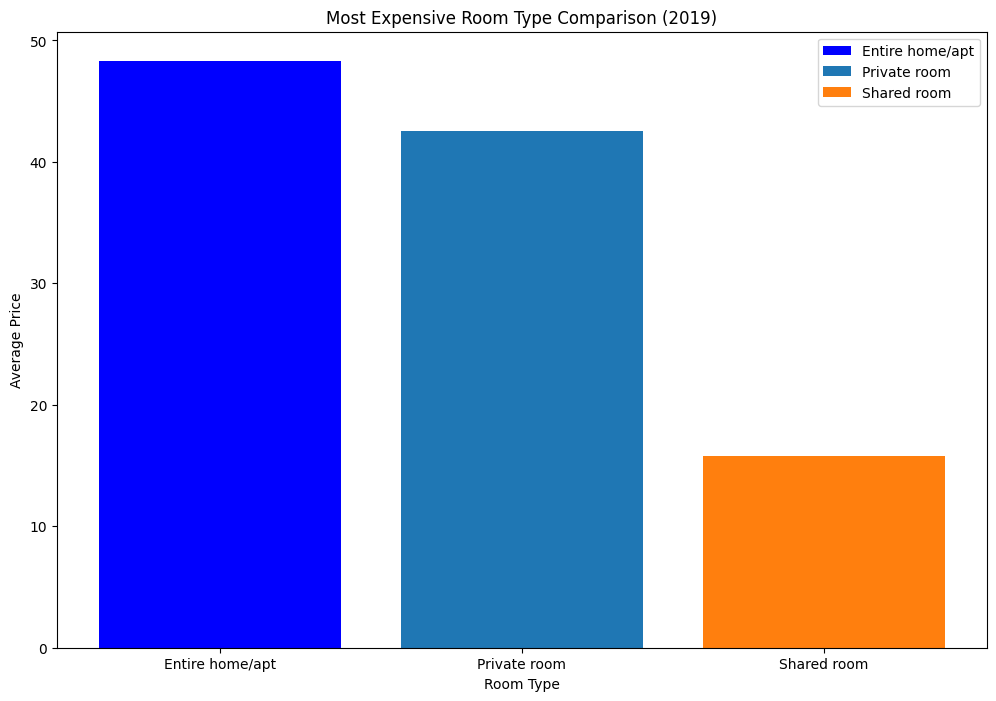

The most expensive room type in 2019 is Entire home/apt with an average price of $48.30.


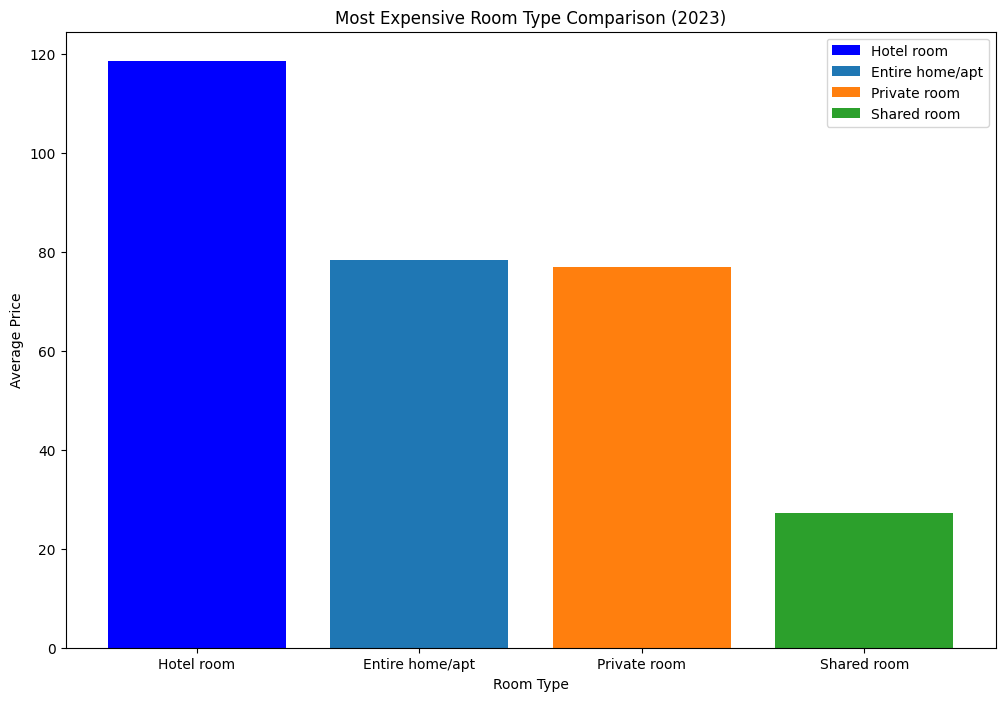

The most expensive room type in 2023 is Hotel room with an average price of $118.57.


In [44]:
#1.8

def find_most_expensive_roomtype(dataframe):
    # Group the data by room type and calculate the average price for each room type
    average_price_per_roomtype = dataframe.groupby('room_type')['price'].mean()

    # Find the room type with the highest average price
    most_expensive_roomtype = average_price_per_roomtype.idxmax()
    highest_average_price = average_price_per_roomtype.max()

    return most_expensive_roomtype, highest_average_price

def plot_most_expensive_roomtype_comparison(dataframe, year):
    # Find the most expensive room type for the given year
    most_expensive_roomtype, highest_average_price = find_most_expensive_roomtype(dataframe)

    # Exclude the most expensive room type from the dataframe
    other_roomtypes = dataframe[dataframe['room_type'] != most_expensive_roomtype]

    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(most_expensive_roomtype, highest_average_price, color='blue', label=most_expensive_roomtype)

    # Plot other room types separately
    for room_type in other_roomtypes['room_type'].unique():
        avg_price = other_roomtypes[other_roomtypes['room_type'] == room_type]['price'].mean()
        plt.bar(room_type, avg_price, label=room_type)

    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title(f'Most Expensive Room Type Comparison ({year})')
    plt.legend()
    plt.show()

    # Print most expensive room type and its average price
    print(f"The most expensive room type in {year} is {most_expensive_roomtype} with an average price of ${highest_average_price:.2f}.")

# Plot the comparison for 2019
plot_most_expensive_roomtype_comparison(train_2019, 2019)

# Plot the comparison for 2023
plot_most_expensive_roomtype_comparison(train_2023, 2023)


# 1.9
We created the map only for the 0.05 sample of the 2019, in order the map to load properly.

In [35]:
#1.9
def create_property_map(dataframe, sample_fraction=0.05):
    # Take a smaller sample of the DataFrame
    sampled_listings_df = dataframe.sample(frac=sample_fraction)

    # Create a map centered around Athens
    athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12)

    # Iterate through each property in the sampled DataFrame and add a marker to the map
    for idx, row in sampled_listings_df.iterrows():
        popup_html = f"Room Type: {row['room_type']}<br>" \
                     f"Price: ${row['price']:.2f}<br>" \
                     f"Review Rating: {row['review_scores_rating']}"

        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup_html,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(athens_map)

    # Display the map
    return athens_map

# Create property map for 2019
property_map_2019 = create_property_map(train_2019)
property_map_2019


#1.10

We pulled again the data folders, because we didnt initialized our train structure for this question. So, we get the reviews.csv and get the last comment for our wordclouds last review.

In [36]:
#We didnt put comments on the train files so we have to pull them again and modify then accordingly

reviews_april_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/april/reviews.csv')
reviews_febrouary_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/febrouary/reviews.csv')
reviews_march_2019 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2019/march/reviews.csv')

reviews_june_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/june/reviews.csv')
reviews_march_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/march/reviews.csv')
reviews_september_2023 = pd.read_csv('/content/gdrive/MyDrive/tede-project1/data/2023/september/reviews.csv')

# Concatenate review DataFrames for each year
reviews_2019 = pd.concat([reviews_april_2019, reviews_febrouary_2019, reviews_march_2019])
reviews_2023 = pd.concat([reviews_june_2023, reviews_march_2023, reviews_september_2023])

# Remove emojis from 'comments' column
reviews_2019['comments'] = reviews_2019['comments'].str.encode('ascii', 'ignore').str.decode('ascii')
reviews_2023['comments'] = reviews_2023['comments'].str.encode('ascii', 'ignore').str.decode('ascii')

# Group reviews by 'listing_id' and select the last comment for each listing
last_comments_2019 = reviews_2019.groupby('listing_id')['comments'].last().reset_index()
last_comments_2023 = reviews_2023.groupby('listing_id')['comments'].last().reset_index()

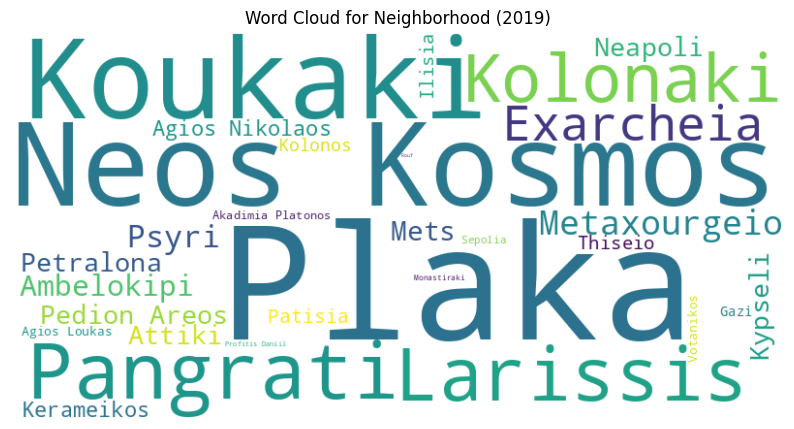

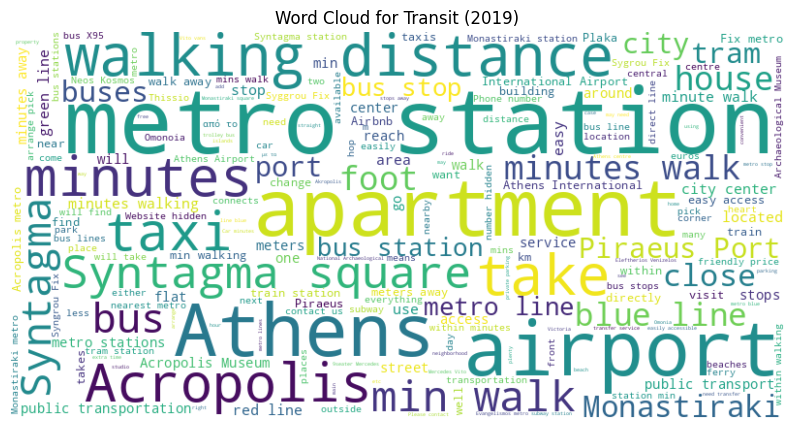

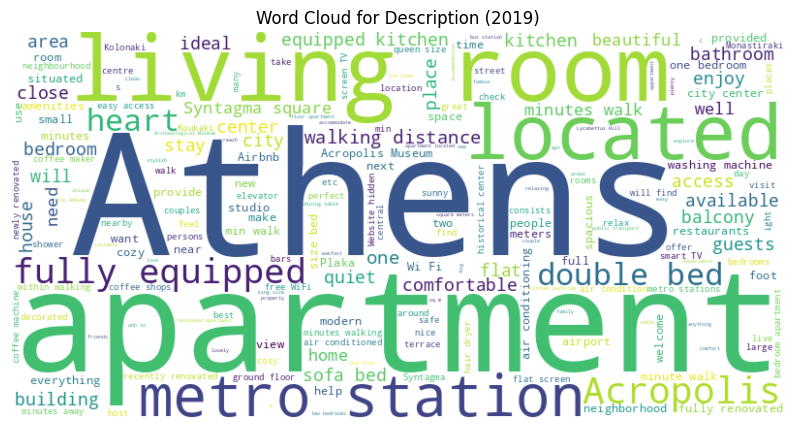

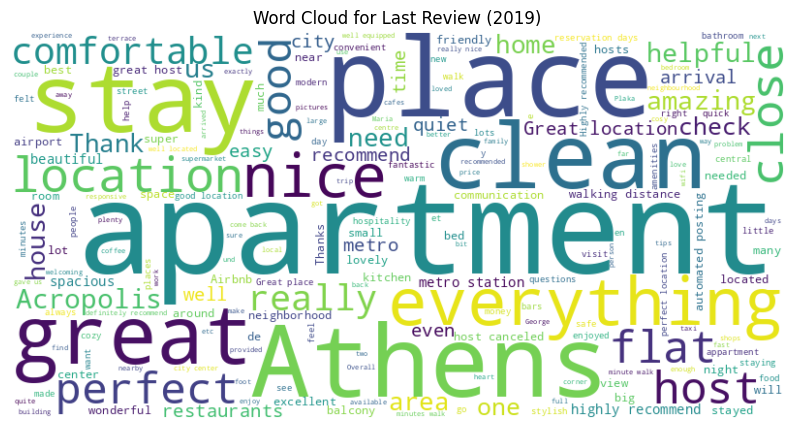

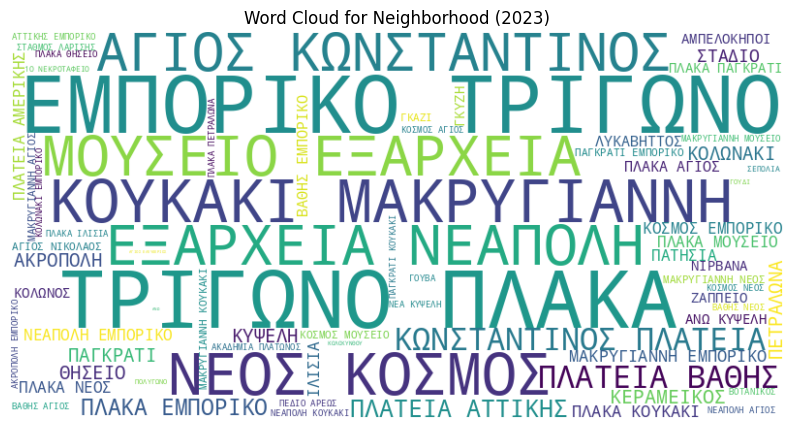

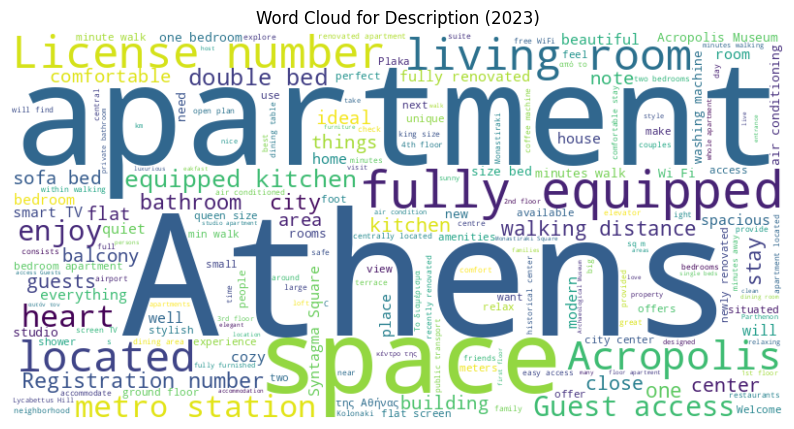

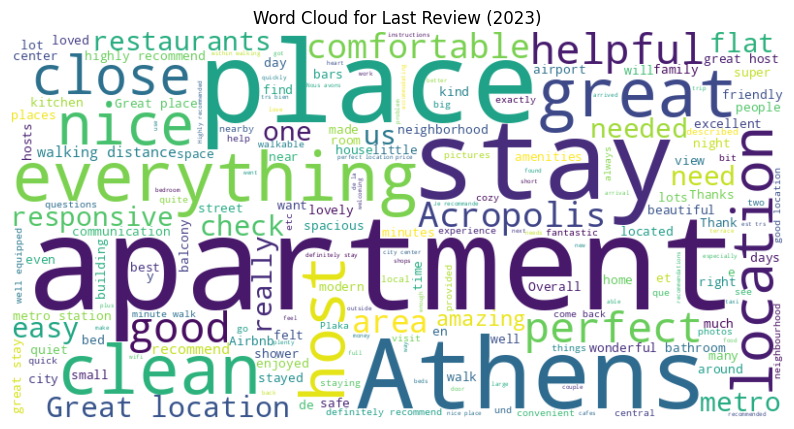

In [37]:
#1.10

#Removed some trash characters
def generate_wordcloud_for_dataframe(dataframe, column_name, title):
    text = ' '.join(dataframe[column_name].dropna())
    # Remove <br> and <b> tags
    text = text.replace('<br>', '').replace('<b>', '').replace('</b>', '').replace('/br', '').replace('br', '')
    wordcloud = WordCloud(width=800, height=400, background_color='white', normalize_plurals=False).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for 2019
generate_wordcloud_for_dataframe(train_2019.sample(frac=0.5), 'neighbourhood', 'Word Cloud for Neighborhood (2019)')
generate_wordcloud_for_dataframe(train_2019.sample(frac=0.5), 'transit', 'Word Cloud for Transit (2019)')
generate_wordcloud_for_dataframe(train_2019.sample(frac=0.5), 'description', 'Word Cloud for Description (2019)')
generate_wordcloud_for_dataframe(last_comments_2019, 'comments', 'Word Cloud for Last Review (2019)')

# Generate word clouds for 2023
generate_wordcloud_for_dataframe(train_2023.sample(frac=0.5), 'neighbourhood_cleansed', 'Word Cloud for Neighborhood (2023)')
generate_wordcloud_for_dataframe(train_2023.sample(frac=0.5), 'description', 'Word Cloud for Description (2023)')
generate_wordcloud_for_dataframe(last_comments_2023, 'comments', 'Word Cloud for Last Review (2023)')



# 1.11

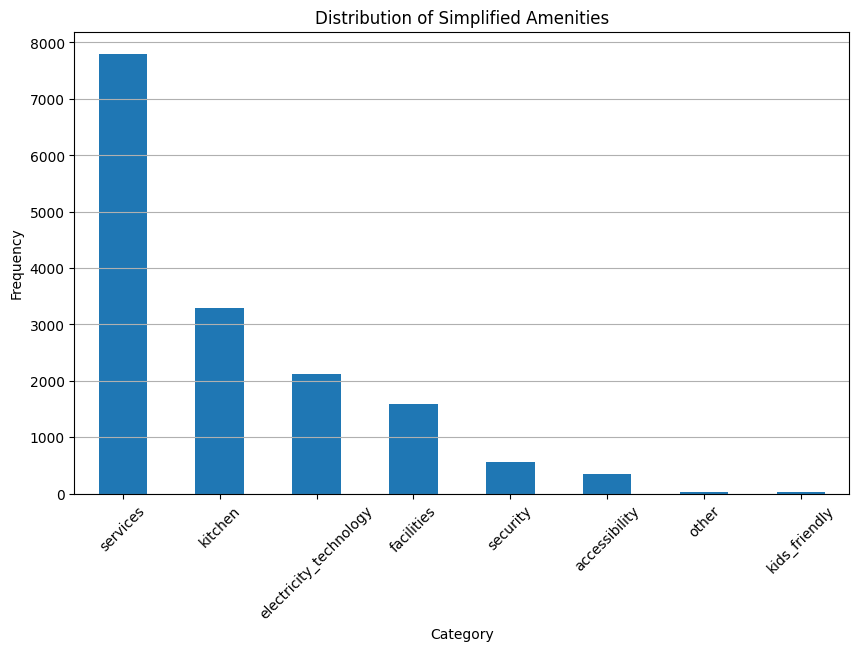

In [38]:
#1.11 only for 2019!

# Define a function to map original amenities to categories
def simplify_amenities(amenity):
    # Tokenize the amenity text
    tokens = word_tokenize(amenity.lower())

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Define categories and their associated keywords
    categories = {
        'kitchen': ['kitchen', 'cooking', 'oven', 'stove', 'microwave'],
        'accessibility': ['wheelchair', 'accessible', 'parking'],
        'electricity_technology': ['wifi', 'tv', 'cable', 'smart', 'laptop', 'workspace'],
        'facilities': ['pool', 'gym', 'hot', 'tub', 'sauna'],
        'kids_friendly': ['children', 'kids', 'toys', 'baby'],
        'security': ['smoke', 'alarm', 'fire', 'extinguisher', 'safety', 'card'],
        'services': ['breakfast', 'self', 'check', 'long', 'term', 'stays', 'allowed']
    }

    # Initialize simplified category as 'other'
    simplified_category = 'other'

    # Find the first matching category for each token
    for token in tokens:
        for category, keywords in categories.items():
            if any(keyword in token for keyword in keywords):
                simplified_category = category
                break

    return simplified_category

# Apply the simplify_amenities function to create a new column 'simplified_amenities'
train_2019['simplified_amenities'] = train_2019['amenities'].apply(simplify_amenities)

# Plot a histogram to distribute the new values
plt.figure(figsize=(10, 6))
train_2019['simplified_amenities'].value_counts().plot(kind='bar')
plt.title('Distribution of Simplified Amenities')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 1.12

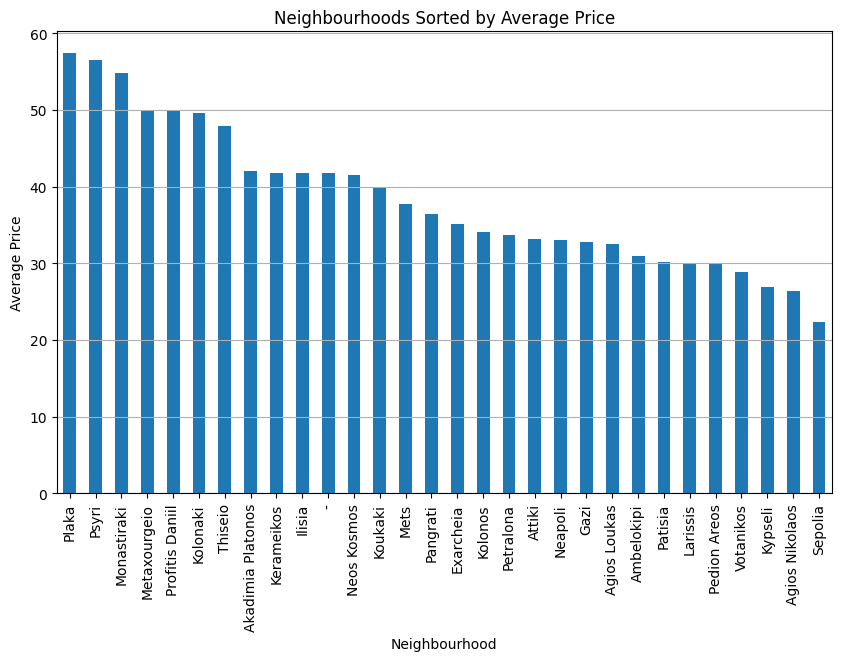

Neighbourhoods Classification:
neighbourhood
Plaka                expensive
Psyri                expensive
Monastiraki          expensive
Metaxourgeio         expensive
Profitis Daniil      expensive
Kolonaki             expensive
Thiseio              expensive
Akadimia Platonos    expensive
Kerameikos           expensive
Ilisia               expensive
-                     moderate
Neos Kosmos           moderate
Koukaki               moderate
Mets                  moderate
Pangrati              moderate
Exarcheia             moderate
Kolonos               moderate
Petralona             moderate
Attiki                moderate
Neapoli               moderate
Gazi                     cheap
Agios Loukas             cheap
Ambelokipi               cheap
Patisia                  cheap
Larissis                 cheap
Pedion Areos             cheap
Votanikos                cheap
Kypseli                  cheap
Agios Nikolaos           cheap
Sepolia                  cheap
Name: price, dtype: categ

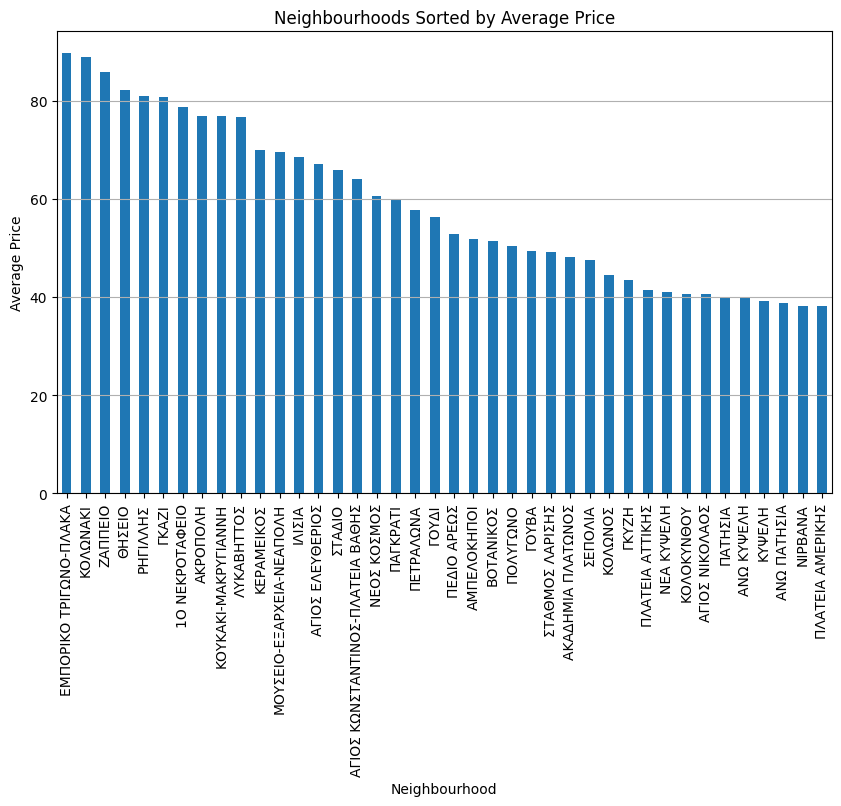

Neighbourhoods Classification:
neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              expensive
ΚΟΛΩΝΑΚΙ                            expensive
ΖΑΠΠΕΙΟ                             expensive
ΘΗΣΕΙΟ                              expensive
ΡΗΓΙΛΛΗΣ                            expensive
ΓΚΑΖΙ                               expensive
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      expensive
ΑΚΡΟΠΟΛΗ                            expensive
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 expensive
ΛΥΚΑΒΗΤΤΟΣ                          expensive
ΚΕΡΑΜΕΙΚΟΣ                          expensive
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            expensive
ΙΛΙΣΙΑ                              expensive
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                     moderate
ΣΤΑΔΙΟ                               moderate
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     moderate
ΝΕΟΣ ΚΟΣΜΟΣ                          moderate
ΠΑΓΚΡΑΤΙ                             moderate
ΠΕΤΡΑΛΩΝΑ                            moderate
ΓΟΥΔΙ                                moderate
ΠΕΔΙΟ ΑΡΕΩΣ               

In [39]:
#1.12

def classify_neighbourhoods(dataframe, accommodates_column, neighbourhood_column):
    # Filter the DataFrame to include only rooms that accommodate two people
    rooms_for_two = dataframe[dataframe[accommodates_column] == 2]

    # Group the filtered data by neighborhood and calculate the average price per neighborhood
    avg_price_per_neighborhood = rooms_for_two.groupby(neighbourhood_column)['price'].mean().sort_values(ascending=False)

    # Plot the neighborhoods sorted by average price
    plt.figure(figsize=(10, 6))
    avg_price_per_neighborhood.plot(kind='bar')
    plt.title('Neighbourhoods Sorted by Average Price')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Average Price')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

    # Classify neighborhoods into three groups based on average price
    price_groups = pd.qcut(avg_price_per_neighborhood, q=3, labels=['cheap', 'moderate', 'expensive'])

    # Display the classification
    print("Neighbourhoods Classification:")
    print(f"{price_groups}")

# For 2019
classify_neighbourhoods(train_2019, 'accommodates', 'neighbourhood')

# For 2023
classify_neighbourhoods(train_2023, 'accommodates', 'neighbourhood_cleansed')

#1.13

Question 1:
Average Price Comparison of Most Expensive Room Types (2019 vs. 2023):
Compare the average price of the most expensive room type between 2019 and 2023 using a bar chart.

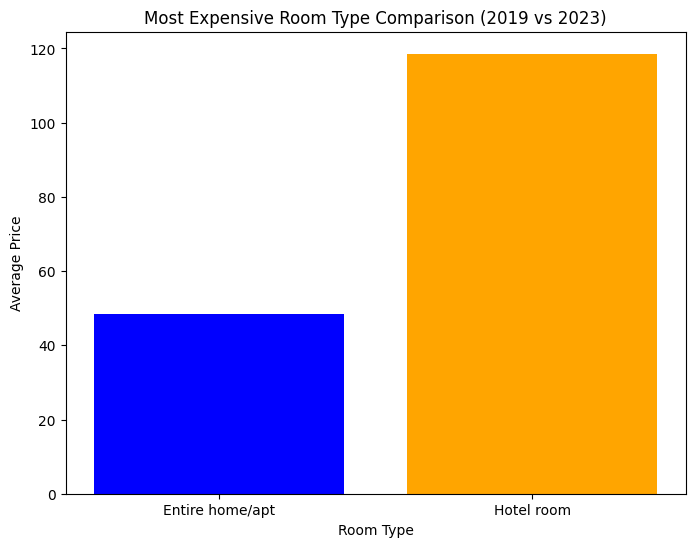

In [40]:
# Define a function to find the most expensive room type
def find_most_expensive_roomtype(dataframe):
    average_price_per_roomtype = dataframe.groupby('room_type')['price'].mean()
    most_expensive_roomtype = average_price_per_roomtype.idxmax()
    highest_average_price = average_price_per_roomtype.max()
    return most_expensive_roomtype, highest_average_price

# Define a function to plot the comparison of the most expensive room types
def plot_most_expensive_roomtype_comparison(roomtype_2019, price_2019, roomtype_2023, price_2023):
    plt.figure(figsize=(8, 6))
    plt.bar([roomtype_2019, roomtype_2023], [price_2019, price_2023], color=['blue', 'orange'])
    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title('Most Expensive Room Type Comparison (2019 vs 2023)')
    plt.show()

# For 2019
most_expensive_roomtype_2019, highest_average_price_2019 = find_most_expensive_roomtype(train_2019)

# For 2023
most_expensive_roomtype_2023, highest_average_price_2023 = find_most_expensive_roomtype(train_2023)

# Plot the comparison
plot_most_expensive_roomtype_comparison(most_expensive_roomtype_2019, highest_average_price_2019, most_expensive_roomtype_2023, highest_average_price_2023)

Question 2:
Analysis of Room Type Distribution Based on Average Price:
Investigate the distribution of room types based on average price per neighbourhood. This analysis aims to understand how the average price varies across different room types within each neighbourhood.

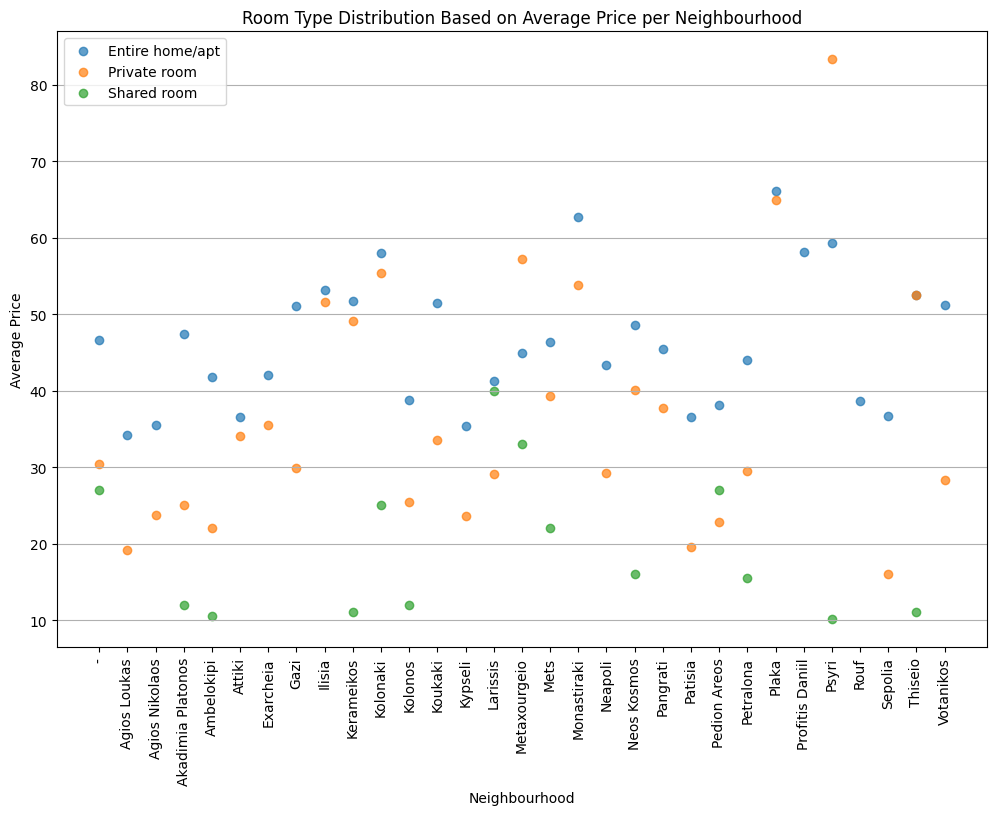

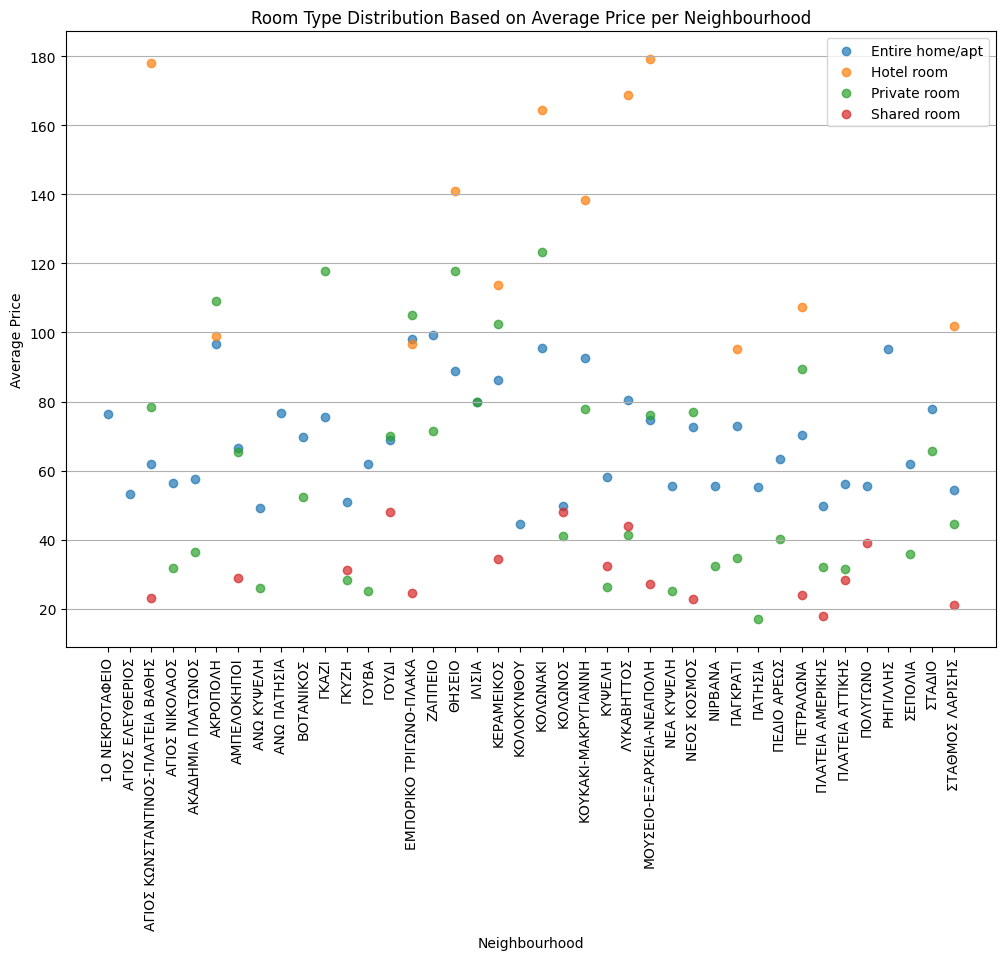

In [41]:
# Define a function to analyze room type distribution based on average price
def analyze_room_type_distribution(dataframe, neighbourhood_column, room_type_column, price_column):
    # Group the data by neighbourhood and room type, and calculate the average price
    avg_price_per_neighbourhood_room_type = dataframe.groupby([neighbourhood_column, room_type_column])[price_column].mean().reset_index()

    # Plot the distribution of room types based on average price
    plt.figure(figsize=(12, 8))
    for room_type in avg_price_per_neighbourhood_room_type[room_type_column].unique():
        data = avg_price_per_neighbourhood_room_type[avg_price_per_neighbourhood_room_type[room_type_column] == room_type]
        plt.scatter(data[neighbourhood_column], data[price_column], label=room_type, alpha=0.7)

    plt.title('Room Type Distribution Based on Average Price per Neighbourhood')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Average Price')
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

# For 2019
analyze_room_type_distribution(train_2019, 'neighbourhood', 'room_type', 'price')

# For 2023
analyze_room_type_distribution(train_2023, 'neighbourhood_cleansed', 'room_type', 'price')


Question 3:
Comparison of Review Scores Across Different Room Types:
Examine the distribution of review scores across different room types to identify any variations in guest satisfaction.

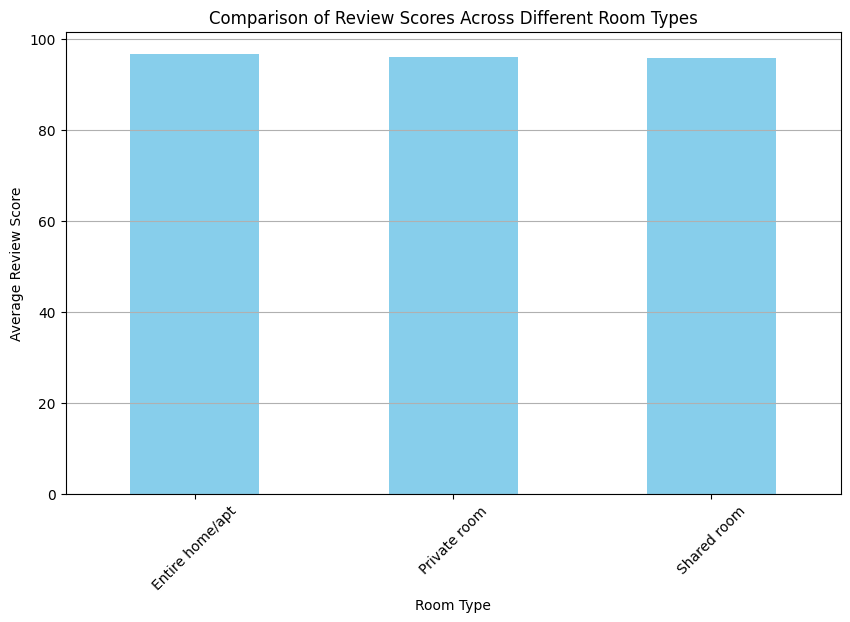

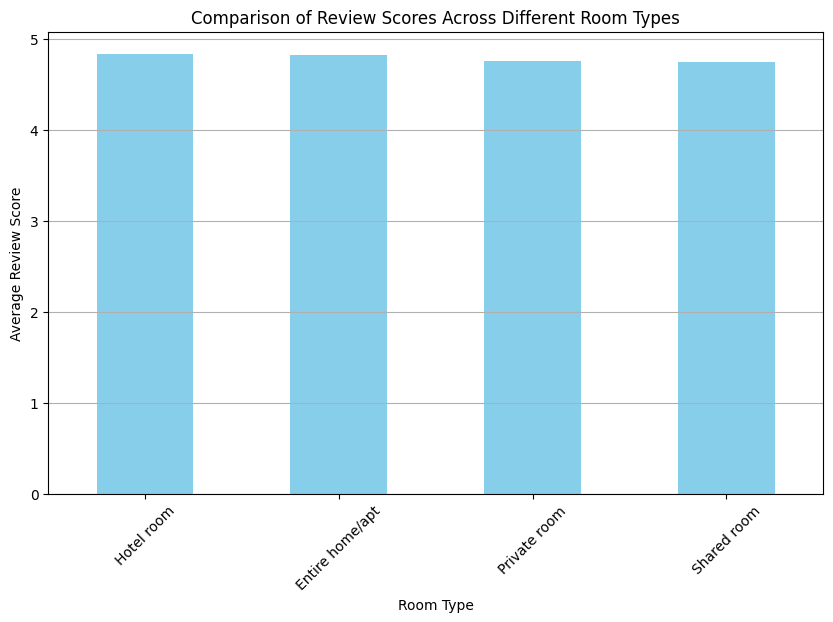

In [42]:
# Define a function to compare review scores across different room types
def compare_review_scores(dataframe, room_type_column, review_score_column):
    # Group the data by room type and calculate the average review score
    avg_review_scores = dataframe.groupby(room_type_column)[review_score_column].mean().sort_values(ascending=False)

    # Plot the comparison of review scores across different room types
    plt.figure(figsize=(10, 6))
    avg_review_scores.plot(kind='bar', color='skyblue')
    plt.title('Comparison of Review Scores Across Different Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Average Review Score')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# For 2019
compare_review_scores(train_2019, 'room_type', 'review_scores_rating')

# For 2023
compare_review_scores(train_2023, 'room_type', 'review_scores_rating')


#1.14

In [43]:
#1.14
def top_hosts_with_most_properties(dataframe, n=10):
    # Drop duplicate rows based on host_id, longitude, and latitude
    unique_listings = dataframe.drop_duplicates(subset=['host_id', 'longitude', 'latitude'])

    # Count the number of unique houses each host has based on longitude and latitude pair
    host_house_count = unique_listings.groupby(['host_id'])['id'].nunique().reset_index(name='num_houses')

    # Aggregate the total number of properties (houses) for each host
    host_properties_count = host_house_count.groupby('host_id')['num_houses'].sum().reset_index(name='num_properties')

    # Sort the hosts based on the number of properties (houses) in descending order
    top_hosts = host_properties_count.sort_values(by='num_properties', ascending=False).head(n)

    return top_hosts[['host_id', 'num_properties']]

# For 2019
top_hosts_2019 = top_hosts_with_most_properties(train_2019)
print("Top 10 Hosts with the Most Properties (Houses) in 2019:")
print(top_hosts_2019)

# For 2023
top_hosts_2023 = top_hosts_with_most_properties(train_2023)
print("\nTop 10 Hosts with the Most Properties (Houses) in 2023:")
print(top_hosts_2023)

Top 10 Hosts with the Most Properties (Houses) in 2019:
        host_id  num_properties
702    29927830              69
2191  135482892              52
33       748818              38
3429  220022946              38
73      1621474              38
2371  149346682              34
1314   65714690              34
103     2718115              31
49      1167063              28
1904  112527018              25

Top 10 Hosts with the Most Properties (Houses) in 2023:
        host_id  num_properties
419    20104194              86
1490  113548208              69
1488  113353393              50
1284   90390850              45
34       748818              44
2075  182156346              42
798    47267002              42
310    13031654              39
3355  407200868              38
1554  123074489              38


# 1.15

We could say, that from our final conclusion, and the help of the diagrams shown, we can say that prices from 2019 to 2023 have rised alot.
<br>More over we can see that the number of listings increased drastically, and the listings got more on the more expensive side of athens. And in one of our final diagrams we can see that a single owner owns more apartments that are listed on airbnb which makes sense, from the prices rising.

#2

Data handling as assisted:
<br>the way our table is constructed:
(id| name+description)
<br>Lastly, we cleaned our description collumn from trash characters and stopwords, before we made the table.

In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords

train_2019_selected = train_2019[['id', 'name', 'description']].copy()  # Use .copy() to create a copy of the subset

# Define function to remove HTML tags from text
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Define function to keep only English characters
def keep_only_english(text):
    english_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return english_text

# Remove HTML tags and stop words from 'name' and 'description' columns
stop_words = set(stopwords.words('english'))
def remove_stopwords_and_html(text):
    clean_text = re.sub(r'<.*?>', '', text)
    words = clean_text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply functions to 'name' and 'description' columns
train_2019_selected['description'] = train_2019_selected['description'].apply(remove_stopwords_and_html)

# Keep only English characters in 'description' column
train_2019_selected['description'] = train_2019_selected['description'].apply(keep_only_english)

# Combine 'name' and 'description' columns into a single column
train_2019_selected['combined_text'] = train_2019_selected['name'] + ' ' + train_2019_selected['description']

# Display the first few rows of the modified DataFrame
print(train_2019_selected.head())


        id                                               name  \
7    31155                              sleep on sailing boat   
16   60394  Cosy 1 bedroom apt! Great central Athens locat...   
28  131133                 Amazing view  2-4/p, Athens center   
30  138386                APARTMENT DORA , Service with style   
31  139877                59m2, 1-br, Hilton & metro, wifi...   

                                          description  \
7   beautiful island Aigina  minutes Athens live g...   
16  Fully furnished cozy apartment best neighborho...   
28  bedroom full bathroom apartment offers everyth...   
30  modern intimate house in heart Athens offers s...   
31  Excellent location next Hilton Hotel  minutes ...   

                                        combined_text  
7   sleep on sailing boat beautiful island Aigina ...  
16  Cosy 1 bedroom apt! Great central Athens locat...  
28  Amazing view  2-4/p, Athens center bedroom ful...  
30  APARTMENT DORA , Service with style mo

Our TF-IDF initialization, with the parametres selected.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with desired parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Limit to 100 features
    ngram_range=(1, 2),  # Use unigrams and bigrams
    stop_words='english',  # Remove English stop words
    min_df=5,  # Ignore terms that appear in fewer than 5 documents
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    sublinear_tf=True,  # Apply sublinear TF scaling
    smooth_idf=True  # Apply smoothing to IDF weights
)

# Fit and transform the combined text column to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(train_2019_selected['combined_text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF matrix
tfidf_table = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the TF-IDF table
print(tfidf_table)


         access  acropolis  air  airport  amenities  apartment  \
0      0.000000   0.000000  0.0      0.0   0.000000   0.000000   
1      0.000000   0.110803  0.0      0.0   0.000000   0.135971   
2      0.145361   0.113189  0.0      0.0   0.000000   0.172163   
3      0.000000   0.000000  0.0      0.0   0.216629   0.200528   
4      0.000000   0.194475  0.0      0.0   0.000000   0.197858   
...         ...        ...  ...      ...        ...        ...   
15769  0.000000   0.293865  0.0      0.0   0.000000   0.000000   
15770  0.000000   0.000000  0.0      0.0   0.000000   0.197606   
15771  0.000000   0.000000  0.0      0.0   0.000000   0.156735   
15772  0.000000   0.176677  0.0      0.0   0.000000   0.000000   
15773  0.000000   0.000000  0.0      0.0   0.000000   0.000000   

       apartment located      area    athens  available  ...    studio  \
0               0.000000  0.000000  0.141280   0.000000  ...  0.000000   
1               0.000000  0.000000  0.211809   0.000000  ..

Our cosine similarity part of the solution, unfortunately we found the top 100 pairs of listings with the best similarity, but we didn't find out a way to sort them out and print. BUT it works properly, so we use the similarity values on our recommend function.

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define the percentage of rows to sample
sample_percentage = 0.05

# Determine the number of rows to sample
num_rows_sampled = int(sample_percentage * tfidf_matrix.shape[0])

# Randomly select a subset of rows from the TF-IDF matrix
sample_indices = np.random.choice(tfidf_matrix.shape[0], num_rows_sampled, replace=False)
sample_tfidf_matrix = tfidf_matrix[sample_indices]

# Calculate cosine similarity between each pair of documents in the sample
cosine_similarities_sample = cosine_similarity(sample_tfidf_matrix, sample_tfidf_matrix)

# Create a DataFrame to store the cosine similarities
cosine_similarities_sample_df = pd.DataFrame(cosine_similarities_sample, index=train_2019_selected.iloc[sample_indices]['id'], columns=train_2019_selected.iloc[sample_indices]['id'])

# Find the top 100 ID pairs with highest similarity
top_similar_pairs_sample = []
for idx, row in cosine_similarities_sample_df.iterrows():
    top_similar_ids = row.drop(idx).nlargest(100).index.tolist()
    for similar_id in top_similar_ids:
        if idx < similar_id:  # Avoid duplicate pairs
            top_similar_pairs_sample.append((idx, similar_id, row[similar_id]))



Our recommend function
<br>It may need some reruns to run correctly because of an type_error in line:  <br><u>similar_listings.sort(key=lambda x: x[1], reverse=True</u>)

It's also made to be tested on the 5% sample on the above part of the exercise. In order to run the notebook once without changing anything.
That's we ensured that at the end the id to run the function with, appears in that 5% sample.

In [18]:
def recommend(item_id, num):
    if item_id not in train_2019_selected['id'].values:
        print("Item ID not found in the dataset.")
        return

    similar_listings = []
    for id1, id2, similarity in top_similar_pairs_sample:
        if id1 == item_id:
            similar_listings.append((id2, similarity))
        elif id2 == item_id:
            similar_listings.append((id1, similarity))

    # Sort the similar listings by similarity score in descending order
    similar_listings.sort(key=lambda x: x[1], reverse=True)

    print(f"Recommending {num} listings similar to {train_2019_selected[train_2019_selected['id'] == item_id]['name'].iloc[0]} based on the above similarity pairs")
    print("-" * 60)

    for idx, (similar_id, similarity) in enumerate(similar_listings[:num], 1):
        name = train_2019_selected[train_2019_selected['id'] == similar_id]['name'].iloc[0]
        description = train_2019_selected[train_2019_selected['id'] == similar_id]['description'].iloc[0]
        print(f"Recommended: {name}")
        print(f"Description: {description}")
        print(f"(score: {similarity})")
        print("-" * 60)


# Example usage
import random

# Randomly select an item ID from the sampled rows
random_item_id = random.choice(train_2019_selected.iloc[sample_indices]['id'].values)

# Call the recommend function with the randomly selected item ID and the top similar pairs sample
# Call the recommend function with the randomly selected item ID
recommend(random_item_id, 5)


Recommending 5 listings similar to Lovely small studio in the heart of Athens based on the above similarity pairs
------------------------------------------------------------
Recommended: Cozy studio in central Athens
Description: Small studio heart Athens including bathroom kitchen bedroom two placed quiet neighborhood many choices walking park front studio nightlife household appliances included minutes walk Sintagma square
(score: 0.6067553047359406)
------------------------------------------------------------
Recommended: Small apartment in the heart of Athens.
Description:                                                                  
(score: 0.5702028055386383)
------------------------------------------------------------
Recommended: Tiny Nest Studio in Plaka - The heart of Athens!
Description: Small cute small fullyrenovated basement studio ideal place stay heart Athens private apartment kitchenette bathroom Plaka epicenter Athens walk anytime day night feel safe many histori

Here we find the top 10 collocations of 2019 descriptions


In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Tokenize the description column
tokenized_descriptions = [word_tokenize(description.lower()) for description in train_2019_selected['description']]

# Filter out stop words
stop_words = set(stopwords.words('english'))
filtered_descriptions = [[word for word in description if word.isalnum() and word not in stop_words] for description in tokenized_descriptions]

# Create a BigramCollocationFinder
bigram_finder = BigramCollocationFinder.from_documents(filtered_descriptions)

# Score bigrams by their frequency
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)

# Get the top 10 bigrams
top_10_bigrams = bigram_scores[:10]

# Print the top 10 bigrams
for idx, (bigram, score) in enumerate(top_10_bigrams, 1):
    print(f"{idx}. {bigram}: {score}")


1. ('living', 'room'): 0.005526588937496006
2. ('metro', 'station'): 0.005220035957369275
3. ('fully', 'equipped'): 0.0044134993843034515
4. ('double', 'bed'): 0.0035447886856907976
5. ('walking', 'distance'): 0.0034895227963158376
6. ('equipped', 'kitchen'): 0.002455877959099788
7. ('center', 'athens'): 0.0024239273668048887
8. ('apartment', 'located'): 0.002160550862752345
9. ('heart', 'athens'): 0.0021467343904086047
10. ('syntagma', 'square'): 0.0017175602182311807
